# Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings("ignore")

from graphviz import Source
from sklearn import tree
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image, SVG, display
from sklearn.tree import export_graphviz

# Loading and analysing the iris dataset

In [30]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data.head())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.describe())
print(data.columns.tolist())
print(data.isnull().sum())
X = data

y=iris.target
print(y)
print(y.shape)
y= pd.DataFrame(y)
print(y.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width

# Visualising the data given

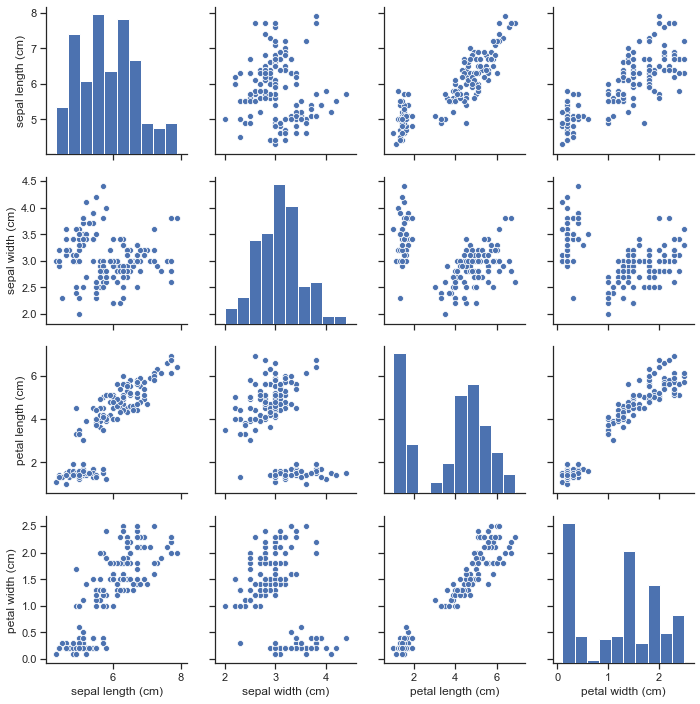

In [31]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, palette="husl")

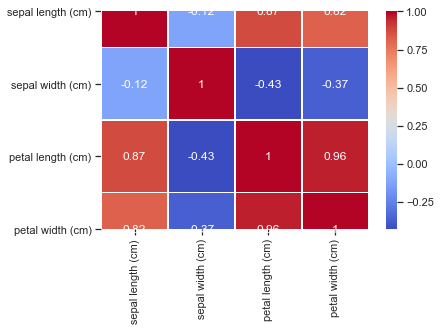

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

# Splitting and Scaling the dataset

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Defining the decision tree algorithm, cross validating and visualising

In [34]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

aa = accuracy_score(y_test, y_pred)
print("accuracy_score: %f" % (aa*100))

accuracy_score: 97.368421


In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("K FOlD Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

K FOlD Accuracy: 96.36 %
Standard Deviation: 6.03 %


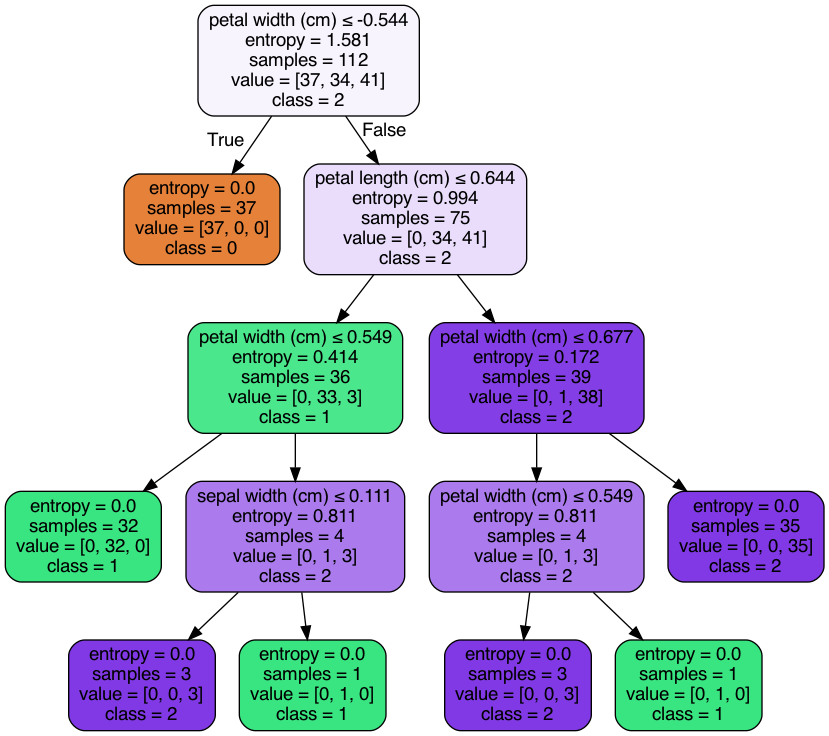

In [36]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True, class_names=['0', '1', '2'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Defining the decision tree algorithm and cross validating with best parameters using GridCV Search and visualising

In [37]:
parameters = {'max_depth':[5,15,25,50,75,100,150,500],'min_samples_split':list(range(2,40)),
             'min_samples_leaf':list(range(2,20))}

In [38]:
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(classifier, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

In [39]:
best_predictions = best_clf.predict(X_test)
a = accuracy_score(y_test, best_predictions)
print("accuracy_score_best: %f" % (a*100))

accuracy_score_best: 97.368421


In [40]:
accuracies_best = cross_val_score(estimator = best_clf, X = X_train, y = y_train, cv = 10)
print("K Fold Accuracy best: {:.2f} %".format(accuracies_best.mean()*100))
print("Standard Deviation best: {:.2f} %".format(accuracies_best.std()*100))

K Fold Accuracy best: 98.18 %
Standard Deviation best: 3.64 %


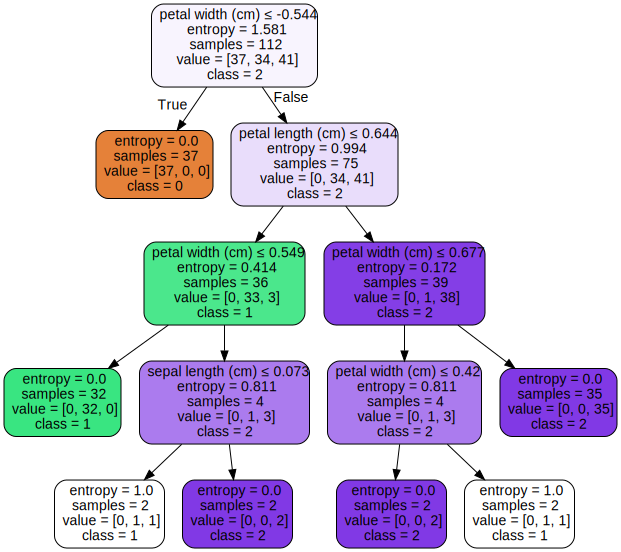

In [41]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, rounded=True, special_characters=True,
            feature_names=iris.feature_names, class_names=['0', '1', '2'], 
            filled = True))
display(SVG(graph.pipe(format='svg')))

# Conclusion

In [42]:
# As it can be seen that accuracy score for the baseline model remained same i.e. 97.368421 in both the cases
# but K - fold Validation accuracy increased with Grid CV Search, from 96.36 % to 98.18 % 
# and Standard Deviation decreased with Grid CV Search, from 6.03 % to 3.64 %

# Hence the classifier defined later produces the better output, that with tuned hyperparameters.